# Importación de librerías

In [1]:
import os
import cv2
import time
import keras
import random
import numpy as np
import tensorflow as tf

from google.colab import drive
from google.colab.patches import cv2_imshow

from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from sklearn.metrics import confusion_matrix, classification_report

# Creación del diccionario de etiquetas


In [2]:
label_dictionary = {0: 'Case',
              1: 'Dialga',
              2: 'Diario Hello Kitty',
              3: 'Forro Hello Kitty',
              4: 'Goku',
              5: 'Paleta de sombras',
              6: 'Pocillo mascotas',
              7: 'Powerbank',
              8: 'Wireless',
              9: 'Cosmetiquera',
              }

# Vínculo vía Google Drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Definición de rutas

In [4]:
test_path = '/content/drive/MyDrive/DatasetNuevo/Test'

In [5]:
test_case_dir = test_path + '/0'  # Directorio con las imagenes de prueba de la clase Case
test_dialga_dir = test_path + '/1'  # Directorio con las imagenes de prueba de la clase Dialga
test_diario_dir = test_path + '/2'  # Directorio con las imagenes de prueba de la clase Diario Hello Kitty
test_forro_dir = test_path + '/3'  # Directorio con las imagenes de prueba de la clase Forro Hello Kitty
test_goku_dir = test_path + '/4'  # Directorio con las imagenes de prueba de la clase Goku
test_paleta_dir = test_path + '/5'  # Directorio con las imagenes de prueba de la clase Paleta de sombras
test_pocillo_dir = test_path + '/6'  # Directorio con las imagenes de prueba de la clase Pocillo de mascotas
test_powerbank_dir = test_path + '/7'  # Directorio con las imagenes de prueba de la Powerbank
test_wireless_dir = test_path + '/8'  # Directorio con las imagenes de prueba de la clase Wireless
test_cosmetiquera_dir = test_path + '/9'  # Directorio con las imagenes de prueba de la clase Cosmetiquera

## Propiedades del DataSet

In [6]:
num_case_tst = len(os.listdir(test_case_dir))
num_dialga_tst = len(os.listdir(test_dialga_dir))
num_diario_tst = len(os.listdir(test_diario_dir))
num_forro_tst = len(os.listdir(test_forro_dir))
num_goku_tst = len(os.listdir(test_goku_dir))
num_paleta_tst = len(os.listdir(test_paleta_dir))
num_pocillo_tst = len(os.listdir(test_pocillo_dir))
num_powerbank_tst = len(os.listdir(test_powerbank_dir))
num_wireless_tst = len(os.listdir(test_wireless_dir))
num_cosmetiquera_tst = len(os.listdir(test_cosmetiquera_dir))

total_tst = num_case_tst + num_dialga_tst + num_diario_tst + num_forro_tst + num_goku_tst + num_paleta_tst + num_pocillo_tst + num_powerbank_tst + num_wireless_tst + num_cosmetiquera_tst

In [7]:
print('Total test Case images:', num_case_tst)
print('Total test Dialga images:', num_dialga_tst)
print('Total test Diario images:', num_diario_tst)
print('Total test Forro images:', num_forro_tst)
print('Total test Goku images:', num_goku_tst)
print('Total test Paleta images:', num_paleta_tst)
print('Total test Pocillo images:', num_pocillo_tst)
print('Total test Powerbank images:', num_powerbank_tst)
print('Total test Wireless images:', num_wireless_tst)
print('Total test Cosmetiquera images:', num_cosmetiquera_tst)
print('-------------')
print('Total test images:', total_tst)

Total test Case images: 100
Total test Dialga images: 100
Total test Diario images: 100
Total test Forro images: 100
Total test Goku images: 100
Total test Paleta images: 100
Total test Pocillo images: 100
Total test Powerbank images: 100
Total test Wireless images: 100
Total test Cosmetiquera images: 100
-------------
Total test images: 1000


# Pre-procesamiento de imágenes

## Aumentación y preparación de datos

In [8]:
test_datagen = ImageDataGenerator(
                rescale = 1./255
                )

test_generator = test_datagen.flow_from_directory(
                test_path,
                target_size = (224,224),
                color_mode = 'rgb',
                classes = None,
                class_mode = 'categorical',
                shuffle = False,
                interpolation = 'nearest'
                )

Found 1000 images belonging to 10 classes.


# Modelo de red

In [9]:
model_path = '/content/drive/MyDrive/DatasetNuevo/ModelosCNN/1716771911.6674159_weights_check.h5'

In [10]:
model = models.load_model(model_path)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [12]:
len(model.layers)

15

# Métricas del modelo de red neuronal

## Evaluación

In [13]:
evaluation = model.evaluate(test_generator)

32/32 [==============================] - 315s 10s/step - loss: 0.2535 - accuracy: 0.9540


In [14]:
evaluation

[0.25352397561073303, 0.9539999961853027]

## Predicción de la red con imágenes de prueba

In [15]:
test_predictions = model.predict(test_generator)

32/32 [==============================] - 4s 129ms/step


In [16]:
predicted_test_images = []

for prediction in test_predictions:
  predicted_test_images.append(np.argmax(prediction))

In [20]:
test_labels = []

for test_folder in range(10):
  test_class = len(os.listdir(test_path+'/'+str(test_folder)))
  for test_image in range(test_class):
    test_labels.append(test_folder)

## Confusion Matrix

In [21]:
model_confusion_matrix = confusion_matrix(test_labels,predicted_test_images)

#Row = True // Columns = Predictions
model_confusion_matrix

array([[ 89,   0,   0,   0,   8,   0,   0,   2,   0,   1],
       [  0,  89,   0,   2,   0,   0,   9,   0,   0,   0],
       [  0,   0,  94,   6,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  97,   0,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,  95,   0,   0,   5,   0,   0],
       [  0,   0,   0,   2,   0,  94,   0,   3,   0,   1],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0,   0,  97,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,  99]])

## Classification Report

In [23]:
model_classification_report = classification_report(test_labels,predicted_test_images,target_names=['Case','Dialga','Diario Hello Kitty', 'Forro Hello Kitty', 'Goku', 'Paleta de sombras', 'Pocillo de mascotas', 'Powerbank', 'Wireless', 'Cosmetiquera'])

model_classification_report

'                     precision    recall  f1-score   support\n\n               Case       1.00      0.89      0.94       100\n             Dialga       1.00      0.89      0.94       100\n Diario Hello Kitty       0.99      0.94      0.96       100\n  Forro Hello Kitty       0.91      0.97      0.94       100\n               Goku       0.90      0.95      0.92       100\n  Paleta de sombras       1.00      0.94      0.97       100\nPocillo de mascotas       0.92      1.00      0.96       100\n          Powerbank       0.88      1.00      0.94       100\n           Wireless       1.00      0.97      0.98       100\n       Cosmetiquera       0.98      0.99      0.99       100\n\n           accuracy                           0.95      1000\n          macro avg       0.96      0.95      0.95      1000\n       weighted avg       0.96      0.95      0.95      1000\n'

# Sección de prueba de la red neuronal

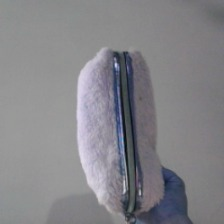

1/1 [==============================] - 0s 62ms/step
-------------
Este producto es = Cosmetiquera


In [32]:
test_files = os.listdir(test_path)
folder = random.choice (test_files)
image_text = random.choice(os.listdir(test_path+'/'+folder))

img = load_img(test_path+'/'+folder+'/'+image_text)
img = img_to_array(img)
sup_img = img

shw_img = cv2.resize(sup_img,(224,224))
cv2_imshow(shw_img)

img = img/255
img = cv2.resize(img,(224,224))

img = np.expand_dims(img,0)

prediction = model.predict(img)
prediction = np.argmax(prediction)


classification = label_dictionary[prediction]
print('-------------')
print('Este producto es = ' + classification)

# Predicción del modelo de red neuronal

## Predicción al usuario

### Subida del archivo externo

In [25]:
from google.colab import files

upload_img = files.upload()

KeyboardInterrupt: 

### Predicción y juego

In [ ]:
user_input_img = str(upload_img).split(sep=':')
user_input_img = str(user_input_img[0]).split(sep='{')
user_input_img = user_input_img[1].replace("'","")

user_img = load_img('/content/' + user_input_img)


user_img = img_to_array(user_img)
sup_img = user_img

shw_img = cv2.resize(sup_img,(224,224))
cv2_imshow(shw_img)

user_img = user_img/255
user_img = cv2.resize(user_img,(224,224))

u_img = np.expand_dims(user_img,0)


user_input_prediction = model.predict(u_img)
user_prediction = np.argmax(user_input_prediction)

user_classification = label_dictionary[user_prediction]

print('-------------')
print('Este producto es = ' + user_classification)
print('-------------')

os.remove('/content/' + user_input_img)

### Para volver a probar una predicción de este modelo de red neuronal convolucional, por favor ejecuta las últimas dos celdas.